## Title: Initial Cleaning and Preliminary Analysis of Energy Dataset for Forcast

### Aurthur: Douye Victor Orumieyefa

### Source: https://www.kaggle.com/datasets/albertovidalrod/electricity-consumption-uk-20092022

#### Last Modified: 19/09/2023

In [95]:
#Slecting working directory
%cd C:\Users\douye\Desktop\National_Grid\Demand

C:\Users\douye\Desktop\National_Grid\Demand


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [38]:
#Loading CSV
df = pd.read_csv("historic_demand.csv")

In [39]:
df.head(5)

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


In [40]:
# deleting nulls
df.dropna(axis=0, inplace=True)


In [41]:
df.head()

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


In [42]:
df1 = pd.DataFrame(df)

In [43]:
df1[['date', 'time']] = df1['settlement_date'].str.split(' ', 1, expand=True)

In [44]:
df1.head(5)

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,date,time
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,...,33,2002,0,0,-161,0,0,1,2009-01-01,00:00:00
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,...,157,2002,0,0,-160,0,0,1,2009-01-01,00:30:00
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,...,511,2002,0,0,-160,0,0,1,2009-01-01,01:00:00
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,...,589,1772,0,0,-160,0,0,1,2009-01-01,01:30:00
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,...,851,1753,0,0,-160,0,0,1,2009-01-01,02:00:00


In [45]:
#dropping original column "settlement date"
df1.drop('settlement_date', axis=1, inplace=True)

In [60]:
df1.head()

,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,date,time
0,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1,2009-01-01,00:00:00
1,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1,2009-01-01,00:30:00
2,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1,2009-01-01,01:00:00
3,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1,2009-01-01,01:30:00
4,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1,2009-01-01,02:00:00


In [61]:
# Convert 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

In [62]:
# Extract the year from the 'date' column and aggregate by year
df1['Year'] = df1['date'].dt.year
yearly_aggregated = df1.groupby('Year')['tsd'].sum().reset_index()

In [63]:
# Rename the columns for clarity
yearly_aggregated.columns = ['Year', 'Total Demand']

In [64]:
yearly_aggregated.head()

,Year,Total Demand
0,2009,653709669
1,2010,662322243
2,2011,639210579
3,2012,627300351
4,2013,635703688


In [65]:
df_year = yearly_aggregated

In [91]:
print(df_year)

    Year  Total Demand  Total Demand (GW)
0   2009     653709669         653709.669
1   2010     662322243         662322.243
2   2011     639210579         639210.579
3   2012     627300351         627300.351
4   2013     635703688         635703.688
5   2014     604463323         604463.323
6   2015     584761329         584761.329
7   2016     572232852         572232.852
8   2017     555182808         555182.808
9   2018     550050163         550050.163
10  2019     534983890         534983.890
11  2020     498668518         498668.518
12  2021     518780635         518780.635
13  2022     520631931         520631.931
14  2023     309628139         309628.139


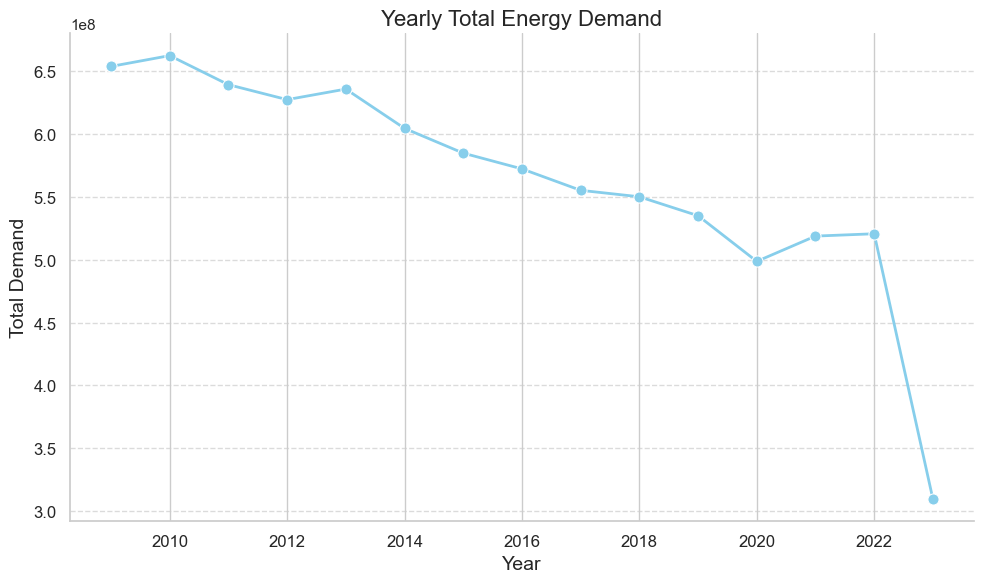

In [92]:
# Setting a Seaborn style to improve aesthetics
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Convert the Total Demand from MW to GW
yearly_aggregated['Total Demand (GW)'] = yearly_aggregated['Total Demand'] / 1000
# Plot the data as a line with markers
sns.lineplot(data=yearly_aggregated, x='Year', y='Total Demand', marker='o', markersize=8, color='skyblue', linewidth=2)
# Add labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Demand', fontsize=14)
ax.set_title('Yearly Total Energy Demand', fontsize=16)
# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)
# Customize grid appearance
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show the plot
plt.tight_layout()
plt.show()





